# Sense and Move

In this notebook, let's put all of what we've learned together and see what happens to an initial probability distribution as a robot goes trough cycles of sensing then moving then sensing then moving, and so on! Recall that each time a robot senses (in this case a red or green color)it gains information about its environment, and everytime it moves, it loses some information due to motion uncertainty.


<img src='images/sense_move.png' width=50% height=50% />


First let's include our usual resource imports and display function.

In [1]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [2]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')


### QUIZ: Given the list motions=[1,1], compute the posterior distribution if the robot first senses red, then moves right one, then senses green, then moves right again, starting with a uniform prior distribution, `p`.

`motions=[1,1]` mean that the robot moves right one cell and then right again. You are given the initial variables and the complete `sense` and `move` function, below.

In [3]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2

motions = [1,1]
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

# You are given the complete sense function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    q=[]
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
        
    # sum up all the components
    s = sum(q)
    # divide all elements of q by the sum to normalize
    for i in range(len(p)):
        q[i] = q[i] / s
    return q


# The complete move function
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        # use the modulo operator to find the new location for a p value
        # this finds an index that is shifted by the correct amount
        index = (i-U) % len(p)
        nextIndex = (index+1) % len(p)
        prevIndex = (index-1) % len(p)
        s = pExact * p[index]
        s = s + pOvershoot  * p[nextIndex]
        s = s + pUndershoot * p[prevIndex]
        # append the correct, modified value of p to q
        q.append(s)
    return q


## Compute the posterior distribution if the robot first senses red, then moves 
## right one, then senses green, then moves right again, starting with a uniform prior distribution.

## print/display that distribution

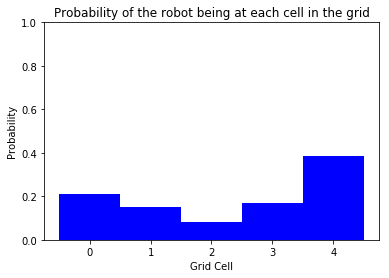

In [4]:
for k in range(len(measurements)):
    p = sense(p, measurements[k])
    p = move(p, motions[k])
display_map(p)

### Clarification about Entropy

The video mentions that entropy will go down after the update step and that entropy will go up after the measurement step. 

In general, **entropy measures the amount of uncertainty**. Since the update step increases uncertainty, then entropy should increase. The measurement step decreases uncertainty, so entropy should decrease.

Let's look at our current example where the robot could be at five different positions. The maximum uncertainty occurs when all positions have equal probabilities  $[0.2, 0.2, 0.2, 0.2, 0.2]$ 

Following the formula $$\text{Entropy} = \Sigma  (-p \times log(p))$$we get $$-5 \times (.2)\times log(0.2) = 0.699$$

Taking a measurement should decrease uncertainty and thus decrease entropy. Let's say after taking a measurement, the probabilities become <span class="mathquill">[0.05, 0.05, 0.05, 0.8, 0.05]</span>. Now the entropy decreased to 0.338. Hence a measurement step should decrease entropy whereas an update step should increase entropy.